<a href="https://colab.research.google.com/github/diegorusso/deep-learning-from-scratch/blob/master/03_non_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-linear classification

Let's see an example of non-linear decision boundary. We need to classify a set of points being red or blue but it cannot be done with a straight line hence linear classification.



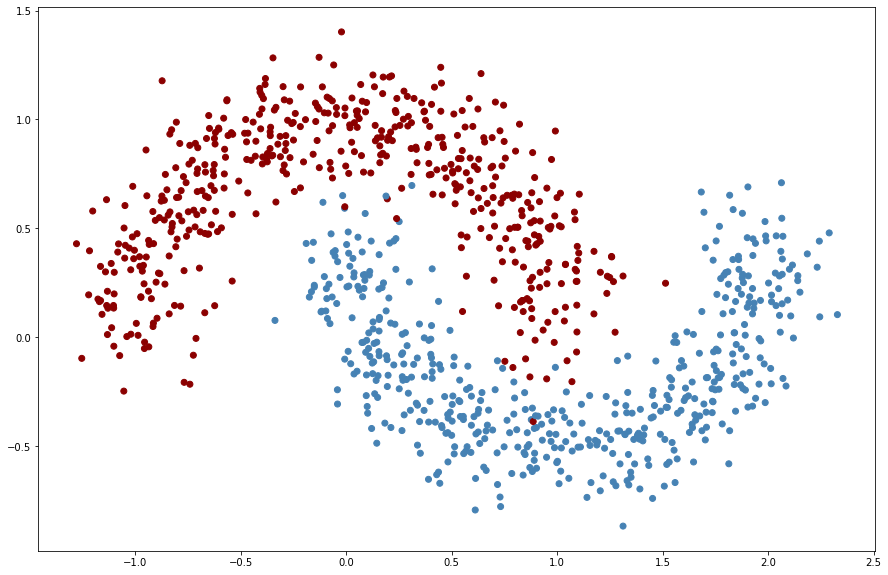

x.shape = (1000, 2) y.shape = (1000, 2)


In [1]:
%matplotlib inline
import numpy as np
np.random.seed(0)
from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

m = 1000

# make_moons() comes from sklearn package
train_x, train_y = datasets.make_moons(n_samples=m, noise=0.15, random_state=0)
colors = ['steelblue' if label == 1 else 'darkred' for label in train_y]
plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(train_x[:,0], train_x[:,1], color=colors)
plt.show()

train_x = train_x.astype(np.float32)
train_y = to_categorical(train_y)

print('x.shape =', train_x.shape, 'y.shape =', train_y.shape)

If we were to use logistic regression the algorithm would try to draw a stright line to separate the red points from the blue ones and the points below the threshold as yellow.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
Accuracy = 0.87


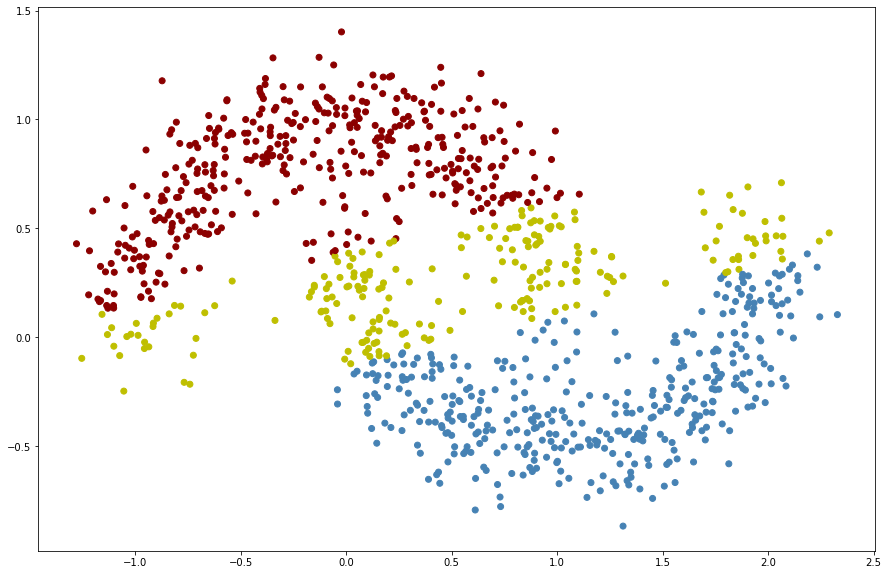

In [2]:
import tensorflow
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import SGD

tensorflow.keras.backend.clear_session()

n_features = 2
# Try increasing/decreasing the number of hidden units and see how it affects
# the prediction
n_hidden = 4
n_labels = 2

model = Sequential()
model.add(Dense(input_shape=(n_features,), units=n_hidden))
model.add(Dense(units=n_labels, activation='softmax'))
model.summary()

# Binary crossentropy because we have only 2 categories
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10000, batch_size=m, verbose=0)

loss_and_acc = model.evaluate(train_x, train_y, batch_size=m, verbose=0)
print('Accuracy = {:4.2f}'.format(loss_and_acc[1]))

softmax = model.predict(train_x, batch_size=m)

c = []

for i in range(m):
    if softmax[i,0] > 0.8:
        c.append('darkred')
    elif softmax[i,1] > 0.8:
        c.append('steelblue')
    else:
        c.append('y')

plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(train_x[:,0], train_x[:,1], color=c)
plt.show()

Logistic regression is not good: **too much bias an too little variance.**

To get a better fit to the data, **we need a non-linear model.** This could be easily done adding the **activation function ReLU in the hidden layer**.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                72        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 50        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________
Accuracy = 0.99


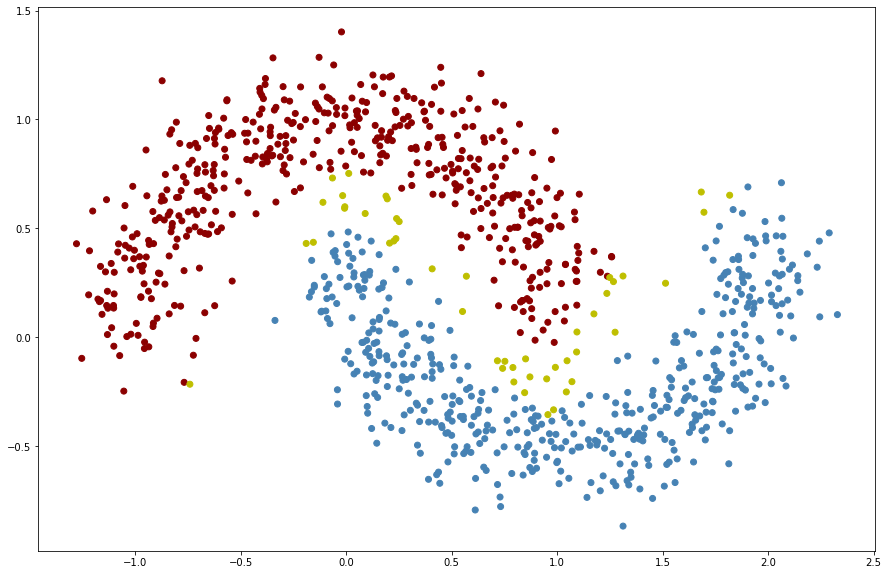

In [3]:
import tensorflow
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import SGD

tensorflow.keras.backend.clear_session()

n_features = 2
# Try increasing/decreasing the number of hidden units and see how it affects
# the prediction
n_hidden = 24
n_labels = 2

model = Sequential()
# NOTE: WE HAVE CHANGED ONLY THE FOLLOWING LINE
model.add(Dense(input_shape=(n_features,), units=n_hidden, activation='relu'))
model.add(Dense(units=n_labels, activation='softmax'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])

model.fit(train_x, train_y, epochs=10000, batch_size=m, verbose=0)

loss_and_acc = model.evaluate(train_x, train_y, batch_size=m, verbose=0)
print('Accuracy = {:4.2f}'.format(loss_and_acc[1]))

softmax = model.predict(train_x, batch_size=m)

c = []

for i in range(m):
    if softmax[i,0] > 0.8:
        c.append('darkred')
    elif softmax[i,1] > 0.8:
        c.append('steelblue')
    else:
        c.append('y')

plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(train_x[:,0], train_x[:,1], color=c)
plt.show()


Et Voilà!

The model has now lower bias and high variance than the linear network.

# A more complex example

We need to classify points in a plane as belonging to one of several clusters of colored points.

The example below will create 6 clusters (3 colors times 2 clusters per color)

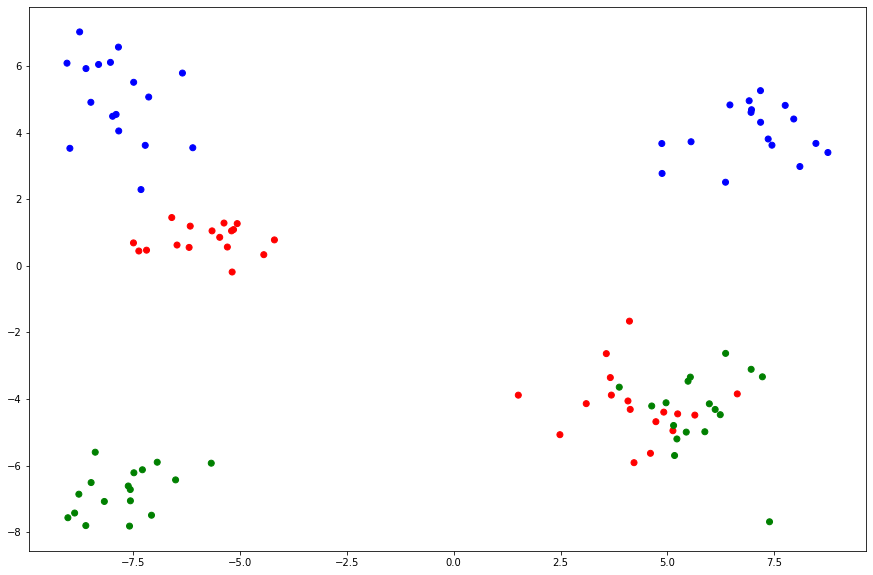

In [4]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

n_features = 2   # The 2 dimensions of each training data point
n_labels   = 3   # The number of categories, shown in various colors (up to 6)
n_clusters = 2   # The number of clusters of each color
spread     = 10  # The maximum distance between the clusters

m          = 102 # The number of datapoints

m = (m // n_labels // n_clusters) * n_labels * n_clusters

rng = np.random.RandomState(seed=6)

x = np.array((rng.standard_normal(m), rng.standard_normal(m)))
x = np.transpose(x)
y = np.empty((m))

batch = m // n_labels // n_clusters

for i in range(n_labels):
    for j in range(n_clusters):
        x[(n_clusters*i+j)*batch:(n_clusters*i+1+j)*batch,0] += rng.randint(-spread,+spread)
        x[(n_clusters*i+j)*batch:(n_clusters*i+1+j)*batch,1] += rng.randint(-spread,+spread)
    y[i*m//n_labels:(i+1)*m//n_labels] = i
    
y = to_categorical(y)

indices = np.arange(m)
random.shuffle(indices)

train_x = np.empty((m,n_features)).astype(np.float32)
train_y = np.empty((m,n_labels))

c = [None]*m

for i in range(m):
    train_x[i] = x[indices[i]]
    train_y[i] = y[indices[i]]

    ix = np.argmax(train_y[i,:])   # The color with the highest probability
    c[i] = ('r', 'g', 'b', 'm', 'c', 'y')[ix]

plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(train_x[:,0], train_x[:,1], color=c)
plt.show()

The network architecture is the same as before but the only difference is there are more classes and possibly more layer and units.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


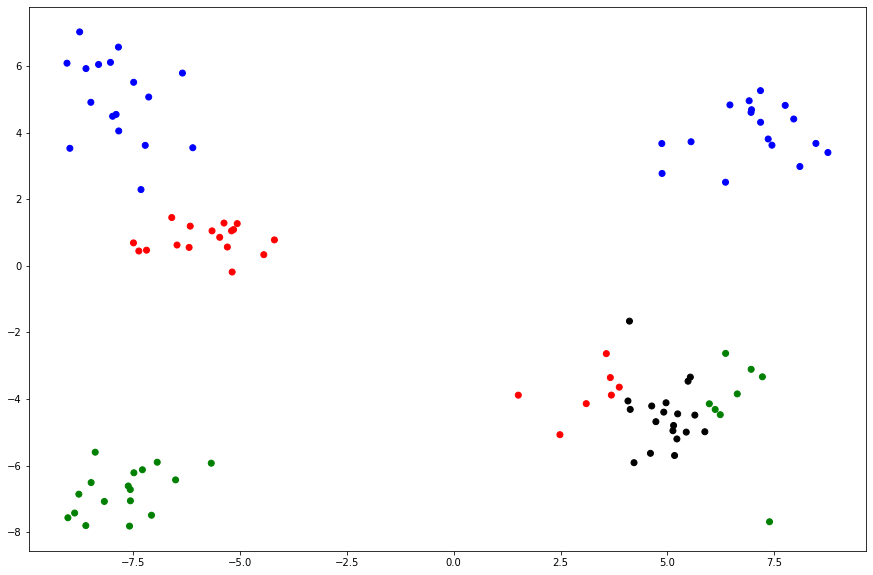

In [5]:
import tensorflow
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import SGD

tensorflow.keras.backend.clear_session()

n_hidden   = 8  # The number of hidden units

model = Sequential()
model.add(Dense(input_shape=(n_features,), units=n_hidden, activation='relu'))
model.add(Dense(units=n_labels, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])

model.fit(train_x, train_y, epochs=5000, batch_size=m, verbose=0)

prediction = model.predict(train_x, batch_size=m)

c = [None]*m
threshold = 0.8

for i in range(m):
    ix = np.argmax(prediction[i,:])   # The color with the highest probability
    # We can have up to 6 colours
    c[i] = ('r', 'g', 'b', 'm', 'c', 'y')[ix]
    if prediction[i,ix] < threshold:
        c[i] = 'k'
        
plt.scatter(train_x[:,0], train_x[:,1], color=c)
plt.show()

Please note that the only predictions below threshold are a few points that fall between the overlapping green and red clusters.

Let's have a look at the decision boundary using a new set of test data different from the training data.

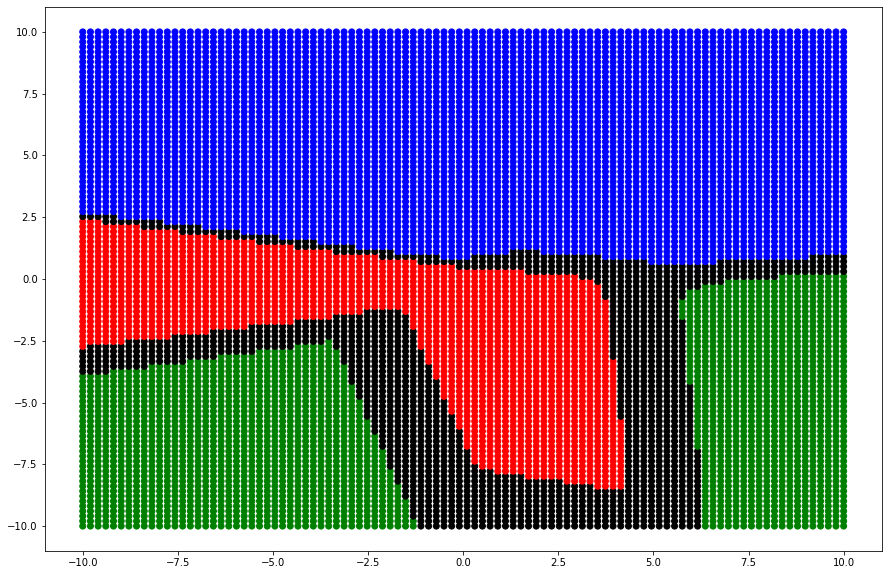

In [6]:
# Random test data
test_m = 10000

threshold = 0.8

# Test data in a square grid
p = 100
test_x = np.empty((test_m,n_features)).astype(np.float32)
k = 0
for xc in np.linspace(-spread,spread,p):
    for yc in np.linspace(-spread,spread,p):
        test_x[k] = (xc, yc)
        k += 1

prediction = model.predict(test_x, batch_size=test_m)

c = [None for i in range(test_m)]

# Color each test point according to the label with the highest probability
for i in range(test_m):
    ix = np.argmax(prediction[i,:])
    c[i] = ('r', 'g', 'b', 'm', 'c', 'y')[ix]
    if prediction[i,ix] < threshold:
        c[i] = 'k'
        
plt.scatter(test_x[:,0], test_x[:,1], color=c)
plt.show()

Now experiment with the above case. Try:

* adding more data points
* adding more categories (up to 6)
* adding more hidden units

See how the above parameters change the prediction of the network